Исследование интернет-магазина компьютерных игр.

В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. В данных, которые нам передали, есть информация о нескольких регионах, топовых платформах, а так же рейтингах и оценках как пользователей, так и критиков. Нам предстоит найти самые популярные игры и сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Цель исследования:
 1. Подсчитать общую выручку для каждой игры.
 2. Выявить топ-5 платформ.
 3. Выявить топ-5 жанров.
 4. Проверить гипотезы

Ход исследования.
Данные об интернет-магазине «Стримчик» я получил. О качестве данных ничего неизвестно. Поэтому первым действием мы проверим данные и поправим их для дальнейшего исследования. Далее будем проводить исследования, визуализировать их графиками и так же писать выводы.

Таким образом, мое исследование пройдет в 6 этапов:
 - Откроем файл с данными и изучим общую информацию
 - Подготовим данные
 - Проведем исследовательский анализ данных
 - Составим портрет пользователя каждого региона
 - Проверим гипотезы
 - Напишем общий вывод

Описание данных которые имеются в таблице:
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.shape

(16715, 11)

По данным которыя я получил можно сделать вывод что есть достаточно большое количество пропусков в данных, так же неправильные типы данных, но есть плюсы, нет дубликатов.

# Шаг 2. Подготовьте данные

2.1 Замените названия столбцов (приведите к нижнему регистру);

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [8]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype(float)

Преобразовал столбец year_of_release так как это целые числа. Так же преобразовал столбец user_score так как тип строки.

2.3 Обработайте пропуски при необходимости:
    
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и  опишите, как его обработать;

In [9]:
data.duplicated(subset=['year_of_release', 'platform', 'name']).sum()

2

In [10]:
data = data.drop_duplicates(subset=['year_of_release', 'platform', 'name'], keep='first')

In [11]:
data.duplicated(subset=['year_of_release', 'platform', 'name']).sum()

0

In [12]:
data = data.dropna(subset=['genre'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

В столбце genre(name) есть 2 пропуска, я решил просто их удалить, их не много, они не столь существенны для анализа.

In [13]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
data['rating'] = data['rating'].fillna('without')

В трех столбцах очень большое количество пропусков которые нельзя заменить средним значением или медианныи значение. Для того что бы данные не удалять мы их оставим не тронутыми. Незаполненные данные появились скорее всего из-за того, что раньше не было критиков которые оценивали игры, оценки пользователей о игре или рейтинги игр. Аббревиатура tbd (to be determined = будет определено), это тоже самое что и NaN так что мы переименовали tbd в NaN.

2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [15]:
data['sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,without,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,without,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,without,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,without,0.01


In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
sales                 0
dtype: int64

# Шаг 3. Проведите исследовательский анализ данных

3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<function matplotlib.pyplot.show(close=None, block=None)>

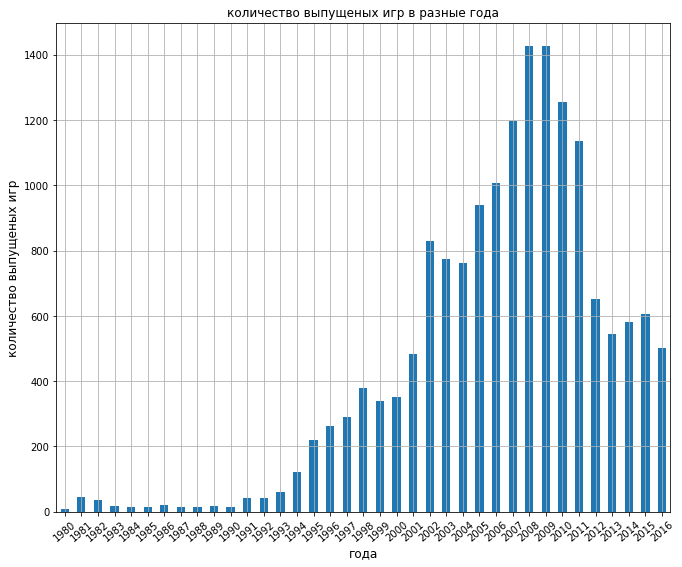

In [17]:
(
    data.groupby('year_of_release')['name']
    .count()
    .plot
    .bar
    (figsize=(11,9), grid=True, title='количество выпущеных игр в разные года')
)
plt.xlabel('года', size= 12)
plt.ylabel('количество выпущеных игр', size=12)
plt.xticks(rotation=40)
plt.show

[Text(0.5, 1.0, 'года')]

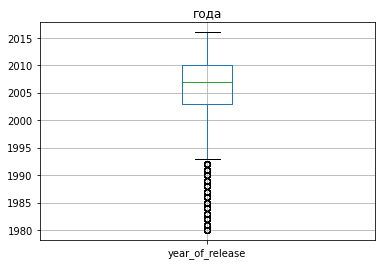

In [18]:
data.boxplot(column=['year_of_release']).set(title='года')

Года с 1980 по 1994 можно не учитывать, слишком маленькое количество выпущеных игр.

3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [19]:
data.groupby('platform')['sales'].sum().sort_values(ascending = False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sales, dtype: float64

In [20]:
sales_by_platforms = data.pivot_table \
(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(6)
sales_by_platforms = sales_by_platforms.reset_index().rename_axis(None, axis=1)
sales_by_platforms

,platform,sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86


In [21]:
top_6_platform = data.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')

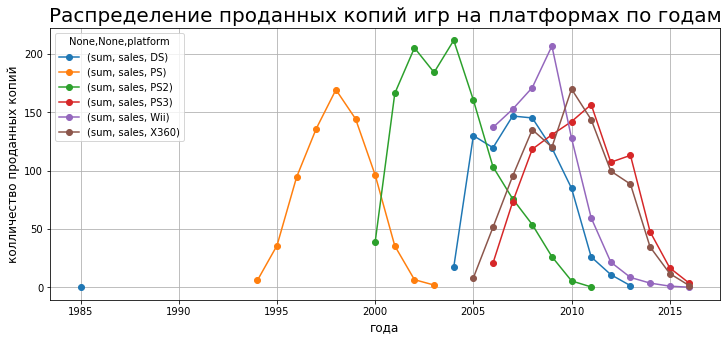

In [22]:
top_platforms_by_years = top_6_platform.pivot_table \
(index = ['year_of_release'], columns= ['platform'], values= ['sales'],aggfunc= ['sum'])
top_platforms_by_years.plot(figsize = (12,5), marker='o', grid=True)
plt.xlabel('года', size= 12)
plt.ylabel('колличество проданных копий', size= 12)
plt.title('Распределение проданных копий игр на платформах по годам', size= 20)
plt.show()

Из графика можно сделать вывод что в среднем платформы существуют в течении 10 лет.

3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [23]:
data_actual = data.query('year_of_release >= 2013')
display(data_actual.head())
data_actual.shape

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,without,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


(2233, 12)

3.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


In [24]:
actual_platform = data_actual.pivot_table \
(index=['platform'], values=['sales'], aggfunc=['sum'])
actual_platform.sort_values(('sum','sales'), ascending=False)

,sum
,sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99


In [25]:
data_actual['year_of_release'].astype(int).unique()

array([2013, 2015, 2014, 2016])

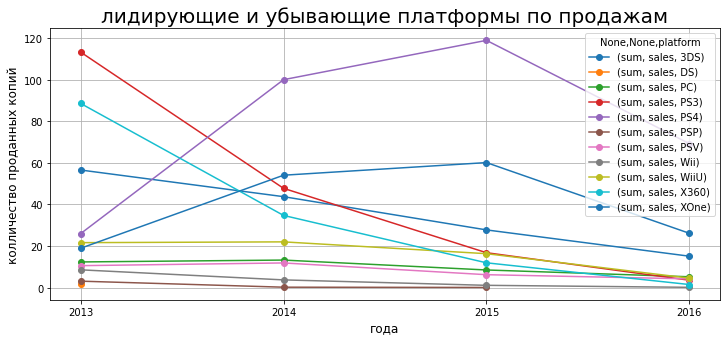

In [26]:
(
    data_actual
    .pivot_table(index = ['year_of_release'], 
                 columns = ['platform'],values = ['sales'],
                 aggfunc =  ['sum'])
    .plot(figsize = (12,5), marker='o', grid=True)
)
plt.xlabel('года', size= 12)
plt.ylabel('колличество проданных копий', size= 12)
plt.title('лидирующие и убывающие платформы по продажам', size= 20)
#plt.xticks([2013, 2014, 2015, 2016])

plt.xticks(data_actual['year_of_release'].astype(int).unique()) # код ревьюера

plt.show()

Вывод: только две компании еще имеют шансы на будущее это PS4 и XOne.

3.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


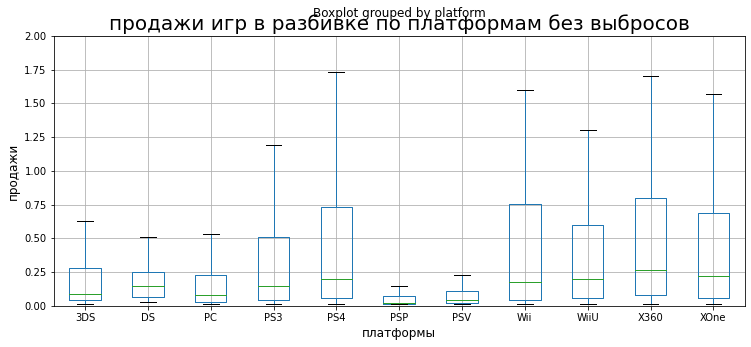

In [27]:
data_actual.boxplot(column= ['sales'], by=['platform'], figsize=(12,5), showfliers=False,)
plt.xlabel('платформы', size= 12)
plt.ylabel('продажи', size= 12)
plt.title('продажи игр в разбивке по платформам без выбросов', size= 20)
plt.ylim([0, 2])
plt.show()

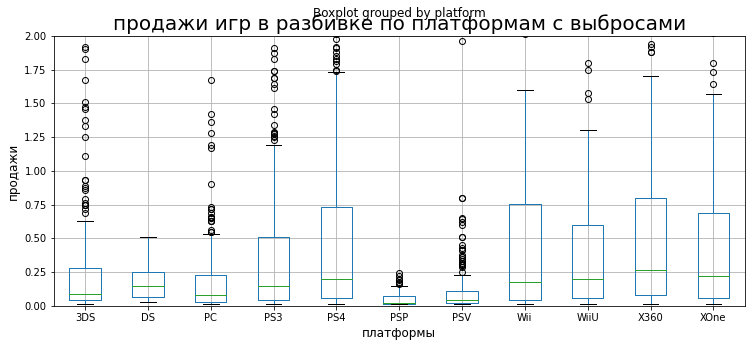

In [28]:
data_actual.boxplot(column= ['sales'], by=['platform'], figsize=(12,5))
plt.xlabel('платформы', size= 12)
plt.ylabel('продажи', size= 12)
plt.title('продажи игр в разбивке по платформам с выбросами', size= 20)
plt.ylim([0, 2])
plt.show()

Как мы видим из графика медиана продажи у большинства платформ находятся на одинковом уровне. Топ платформы это у нас PS3, PS4, X360, XOne, Wii, WiiU.

3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [29]:
data_ps4 = data_actual.query('platform == "PS4"')
data_ps4 = data_ps4.sort_values('user_score',ascending = False)
display(data_actual.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,without,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,without,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,without,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


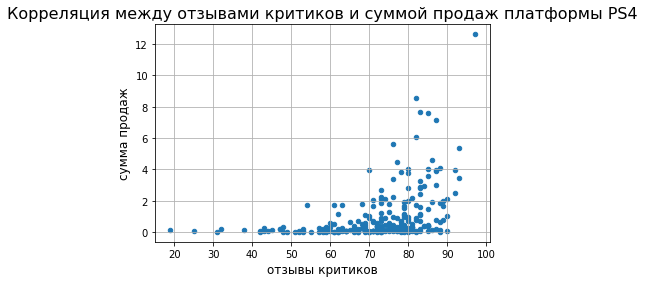

0.40656790206178134

In [30]:
data_ps4.plot(x='critic_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами критиков и суммой продаж платформы PS4', size=16)
plt.xlabel('отзывы критиков', size=12)
plt.ylabel('сумма продаж', size=12)
plt.show()
data_ps4['critic_score'].corr(data_ps4['sales'])

Как мы видим что для платформы PS4 оценки критиков увеличивают корреляцию, но это не говорит нам что оценки критиков являются прямой зависимостью.

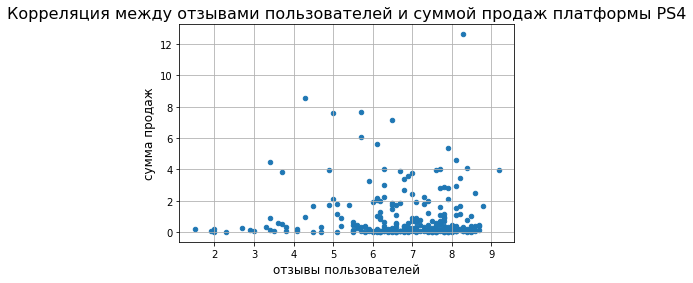

-0.031957110204556424

In [31]:
data_ps4.plot(x='user_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами пользователей и суммой продаж платформы PS4', size=16)
plt.xlabel('отзывы пользователей',size=12)
plt.ylabel('сумма продаж',size=12)
plt.show()
data_ps4['user_score'].corr(data_ps4['sales'])

Для платформы PS4 оценки пользователей никак не влияют, корреляция почти 0.

In [32]:
data_xone = data_actual.query('platform == "XOne"')
data_xone = data_xone.sort_values('user_score',ascending = False)

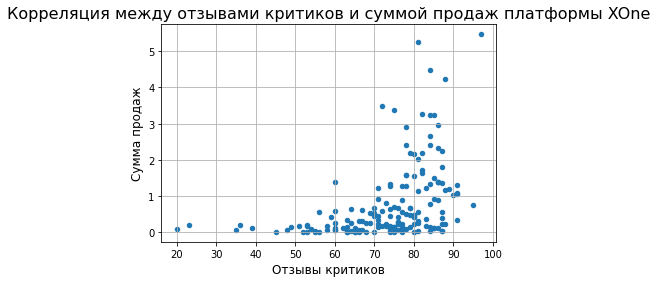

0.4169983280084016

In [33]:
data_xone.plot(x='critic_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами критиков и суммой продаж платформы XOne', size=16)
plt.xlabel('Отзывы критиков', size=12)
plt.ylabel('Сумма продаж', size=12)
plt.show()
data_xone['critic_score'].corr(data_xone['sales'])

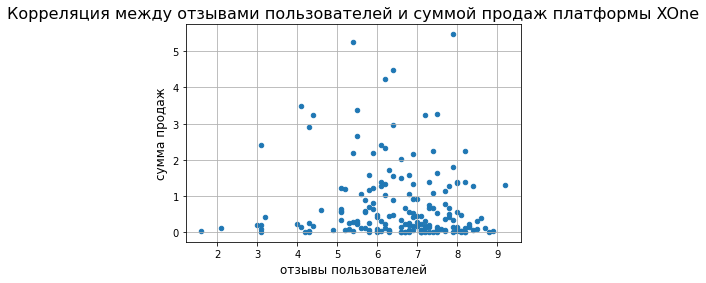

-0.06892505328279423

In [34]:
data_xone.plot(x='user_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами пользователей и суммой продаж платформы XOne', size=16)
plt.xlabel('отзывы пользователей',size=12)
plt.ylabel('сумма продаж',size=12)
plt.show()
data_xone['user_score'].corr(data_xone['sales'])

In [35]:
data_ps3 = data_actual.query('platform == "PS3"')
data_ps3 = data_ps3.sort_values('user_score',ascending = False)

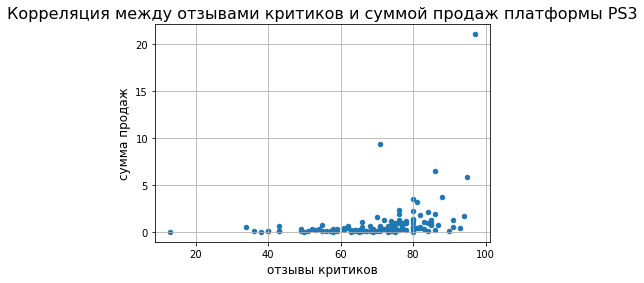

0.33428533933719184

In [36]:
data_ps3.plot(x='critic_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами критиков и суммой продаж платформы PS3', size=16)
plt.xlabel('отзывы критиков', size=12)
plt.ylabel('сумма продаж', size=12)
plt.show()
data_ps3['critic_score'].corr(data_ps3['sales'])

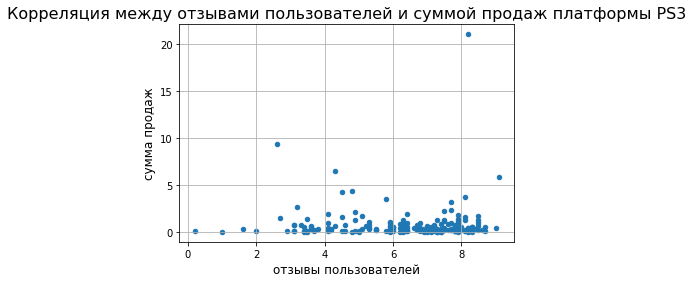

0.0023944027357566773

In [37]:
data_ps3.plot(x='user_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами пользователей и суммой продаж платформы PS3', size=16)
plt.xlabel('отзывы пользователей',size=12)
plt.ylabel('сумма продаж',size=12)
plt.show()
data_ps3['user_score'].corr(data_ps3['sales'])

In [38]:
data_x360 = data_actual.query('platform == "X360"')
data_x360 = data_x360.sort_values('user_score',ascending = False)

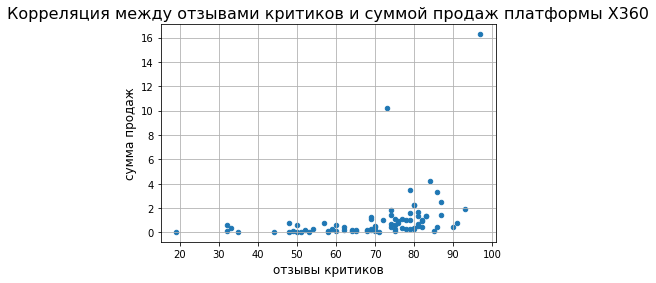

0.3503445460228664

In [39]:
data_x360.plot(x='critic_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами критиков и суммой продаж платформы X360', size=16)
plt.xlabel('отзывы критиков', size=12)
plt.ylabel('сумма продаж', size=12)
plt.show()
data_x360['critic_score'].corr(data_x360['sales'])

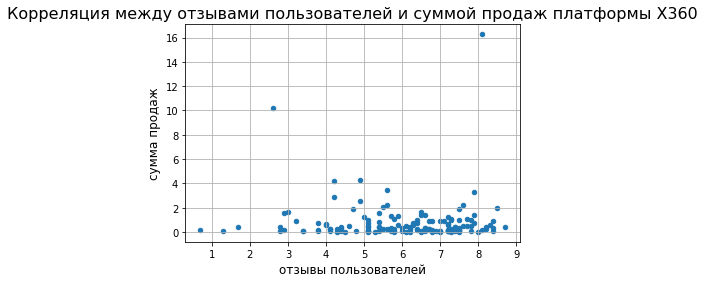

-0.011742185147181356

In [40]:
data_x360.plot(x='user_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами пользователей и суммой продаж платформы X360', size=16)
plt.xlabel('отзывы пользователей',size=12)
plt.ylabel('сумма продаж',size=12)
plt.show()
data_x360['user_score'].corr(data_x360['sales'])

In [41]:
data_wiiu = data_actual.query('platform == "WiiU"')
data_wiiu = data_wiiu.sort_values('user_score',ascending = False)

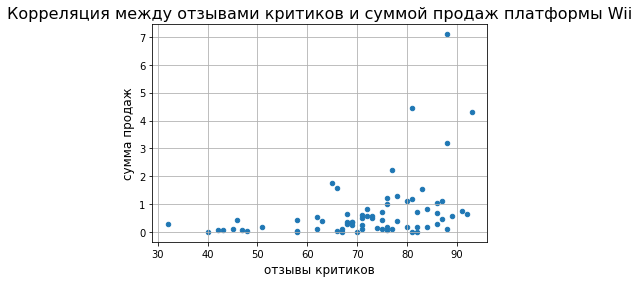

0.3764149065423913

In [42]:
data_wiiu.plot(x='critic_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами критиков и суммой продаж платформы Wii', size=16)
plt.xlabel('отзывы критиков', size=12)
plt.ylabel('сумма продаж', size=12)
plt.show()
data_wiiu['critic_score'].corr(data_wiiu['sales'])

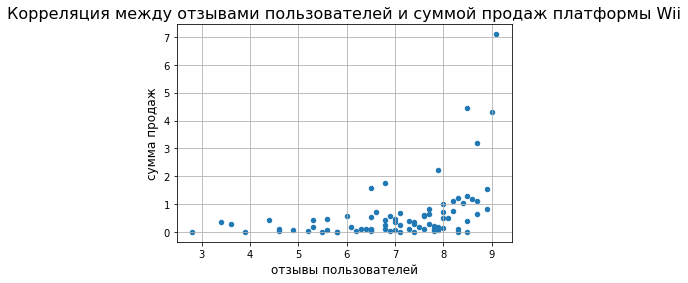

0.41933048192661876

In [43]:
data_wiiu.plot(x='user_score', y='sales', kind='scatter', grid=True)
plt.title('Корреляция между отзывами пользователей и суммой продаж платформы Wii', size=16)
plt.xlabel('отзывы пользователей',size=12)
plt.ylabel('сумма продаж',size=12)
plt.show()
data_wiiu['user_score'].corr(data_wiiu['sales'])

Вывод: положительные отзывы критиков играют небольшую роль в повышении продаж игр, но прямой зависимости тут нет. А отзывы пользователей вообще никак не влияют на продажи, кроме 1 платформы WiiU.

In [44]:
# код ревьюера
def score_corellation(platform):
    
    data_platform = data_actual.query('platform == @platform')
    data_platform = data_platform.sort_values('user_score',ascending = False)

    data_platform.plot(x='critic_score', y='sales', kind='scatter', grid=True)
    plt.title(f'Корреляция между отзывами критиков и суммой продаж платформы {platform}', size=16)
    plt.xlabel('отзывы критиков', size=12)
    plt.ylabel('сумма продаж', size=12)
    plt.show()
    display(data_platform['critic_score'].corr(data_platform['sales']))

    data_platform.plot(x='user_score', y='sales', kind='scatter', grid=True)
    plt.title(f'Корреляция между отзывами пользователей и суммой продаж платформы {platform}', size=16)
    plt.xlabel('отзывы пользователей',size=12)
    plt.ylabel('сумма продаж',size=12)
    plt.show()
    display(data_platform['user_score'].corr(data_platform['sales']))

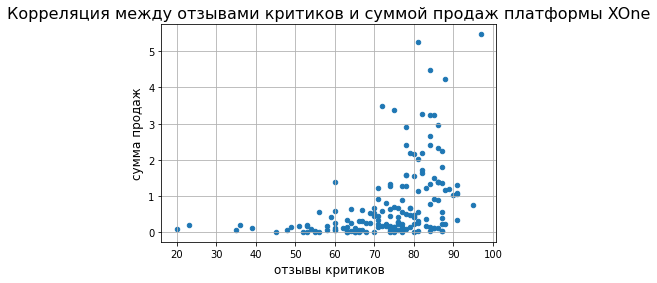

0.4169983280084016

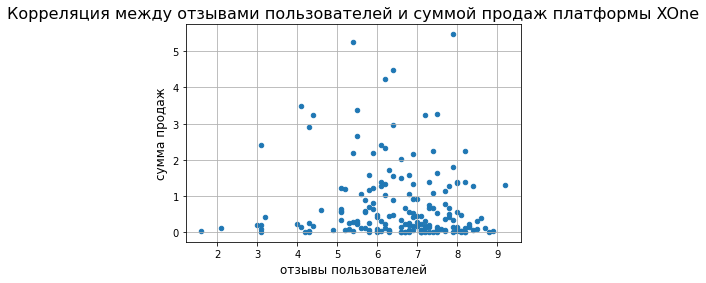

-0.06892505328279423

In [45]:
# код ревьюера
score_corellation('XOne')

3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [46]:
popular_genre = data_actual.pivot_table(index='genre', values='sales', aggfunc='count').sort_values(by='sales', ascending=False)
popular_genre = popular_genre.reset_index().rename_axis(None, axis=1)
popular_genre

,genre,sales
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


<function matplotlib.pyplot.show(close=None, block=None)>

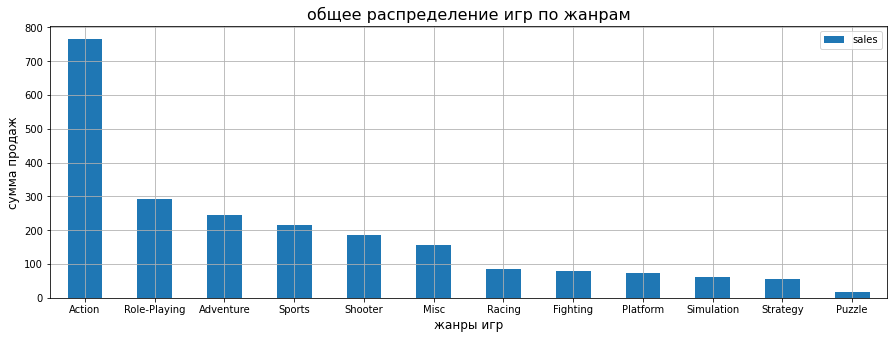

In [47]:
(
    popular_genre
    .plot
    .bar
    (figsize=(15,5), grid=True, x='genre', y='sales')
)
plt.title('общее распределение игр по жанрам', size=16)
plt.xlabel('жанры игр', size=12)
plt.ylabel('сумма продаж', size=12)
plt.xticks(rotation=0)
plt.show

In [48]:
top_genre = data_actual.pivot_table(index='genre', values='sales', aggfunc='median').sort_values(by='sales', ascending=False)
top_genre = top_genre.reset_index().rename_axis(None, axis=1)
top_genre

,genre,sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


<function matplotlib.pyplot.show(close=None, block=None)>

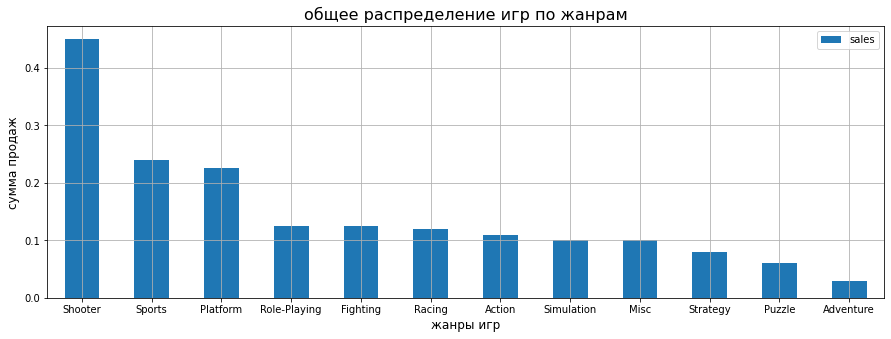

In [49]:
(
    top_genre
    .plot
    .bar
    (figsize=(15,5), grid=True, x='genre', y='sales')
)
plt.title('общее распределение игр по жанрам', size=16)
plt.xlabel('жанры игр', size=12)
plt.ylabel('сумма продаж', size=12)
plt.xticks(rotation=0)
plt.show

Самым прибыльным жанром является Action, так же менее прибыльные Role-Playing, Adventure, Sport. Самую низкую прибыль показывает жанр Puzzle.

Новый вывод.

Жанр Shooter является наиболее продаваемым и с отрывом от Sport, Platform является лидером. А вот замыкает нижнюю плаку в продажах по жанрам Adventure.

# Шаг 4. Составьте портрет пользователя каждого региона

4.1 Определите для пользователя каждого региона (NA, EU, JP):

 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.

 - Самые популярные жанры (топ-5). Поясните разницу.

 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Text(0.5, 1.0, 'популярность платформ в Северной Америке')

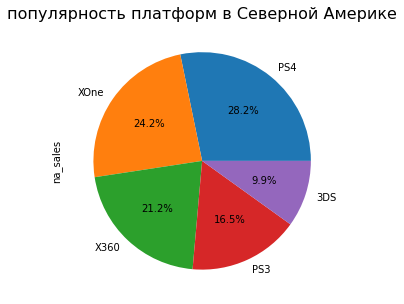

In [50]:
(
    data_actual.groupby('platform')
    .agg({'na_sales': 'sum'})
    .sort_values(by='na_sales',ascending=False)
    .head()
    .plot(kind='pie',subplots=True, autopct='%1.1f%%', figsize = (12,5), legend=False)
)
plt.title('популярность платформ в Северной Америке', size=16)

Text(0.5, 1.0, 'популярность платформ в Европе')

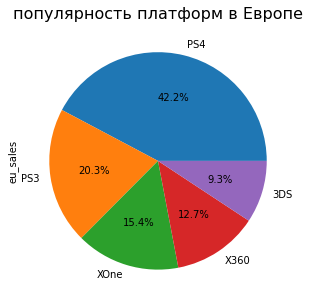

In [51]:
(
    data_actual.groupby('platform')
    .agg({'eu_sales': 'sum'})
    .sort_values(by='eu_sales',ascending=False)
    .head()
    .plot(kind='pie',subplots=True, autopct='%1.1f%%', figsize = (12,5), legend=False)
)
plt.title('популярность платформ в Европе', size=16)

Text(0.5, 1.0, 'популярность платформ в Японии')

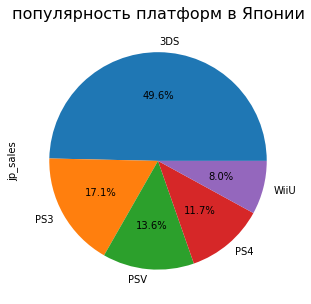

In [52]:
(
    data_actual.groupby('platform')
    .agg({'jp_sales': 'sum'})
    .sort_values(by='jp_sales',ascending=False)
    .head()
    .plot(kind='pie',subplots=True, autopct='%1.1f%%', figsize = (12,5), legend=False)
)
plt.title('популярность платформ в Японии', size=16)

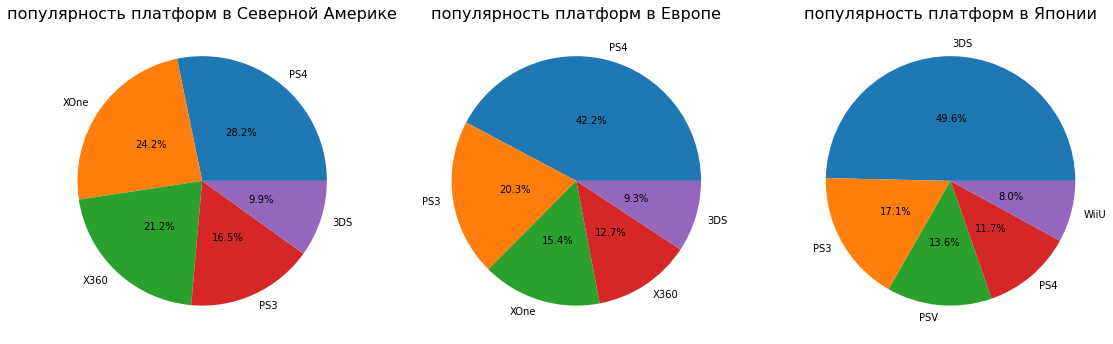

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(19, 7))


(
    data_actual.groupby('platform')
    .agg({'na_sales': 'sum'})
    .sort_values(by='na_sales',ascending=False)
    .head()
    .plot(kind='pie',subplots=True, autopct='%1.1f%%', legend=False, pctdistance=0.5, ax=axs[0])
)
axs[0].set_title('популярность платформ в Северной Америке', size=16)
axs[0].set_ylabel('')

(
    data_actual.groupby('platform')
    .agg({'eu_sales': 'sum'})
    .sort_values(by='eu_sales',ascending=False)
    .head()
    .plot(kind='pie',subplots=True, autopct='%1.1f%%', legend=False, pctdistance=0.5, ax=axs[1])
)
axs[1].set_title('популярность платформ в Европе', size=16)
axs[1].set_ylabel('')

(
    data_actual.groupby('platform')
    .agg({'jp_sales': 'sum'})
    .sort_values(by='jp_sales',ascending=False)
    .head()
    .plot(kind='pie',subplots=True, autopct='%1.1f%%', legend=False, pctdistance=0.5, ax=axs[2])
)
axs[2].set_title('популярность платформ в Японии', size=16)
axs[2].set_ylabel('')

plt.show()

Вывод: PS4 является самой популярной платформой в двух континентах это Европа и Северная Америка в то же время как 3DS является самой не популярной в этих континентах. Но вот в Японии 3DS в свою очередь занимает лидирующую позицию по популярности в то время как PS4 находится на предпоследнем месте по популярности.

<function matplotlib.pyplot.show(close=None, block=None)>

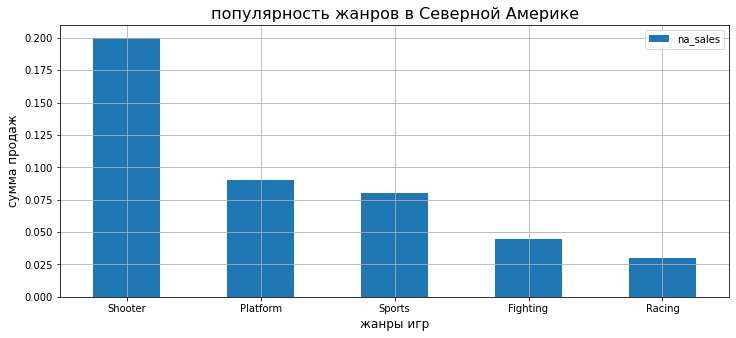

In [54]:
(
    data_actual.pivot_table(index='genre', values='na_sales', aggfunc='median')
    .sort_values(by='na_sales',ascending=False)
    .head()
    .plot(kind='bar', grid=True, figsize = (12,5))
)
plt.title('популярность жанров в Северной Америке', size=16)
plt.xlabel('жанры игр', size=12)
plt.ylabel('сумма продаж', size=12)
plt.xticks(rotation=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

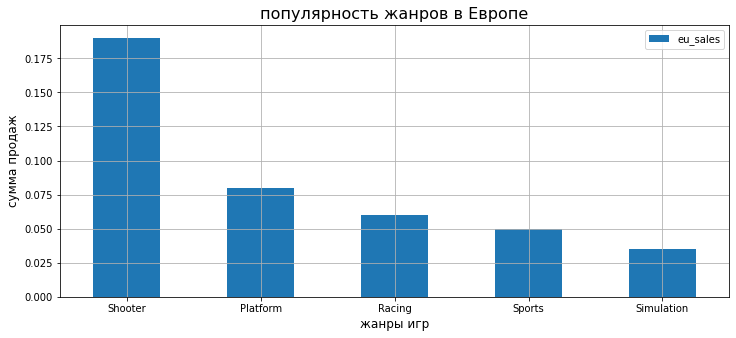

In [55]:
(
    data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='median')
    .sort_values(by='eu_sales',ascending=False)
    .head()
    .plot(kind='bar', grid=True, figsize = (12,5))
)
plt.title('популярность жанров в Европе', size=16)
plt.xlabel('жанры игр', size=12)
plt.ylabel('сумма продаж', size=12)
plt.xticks(rotation=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

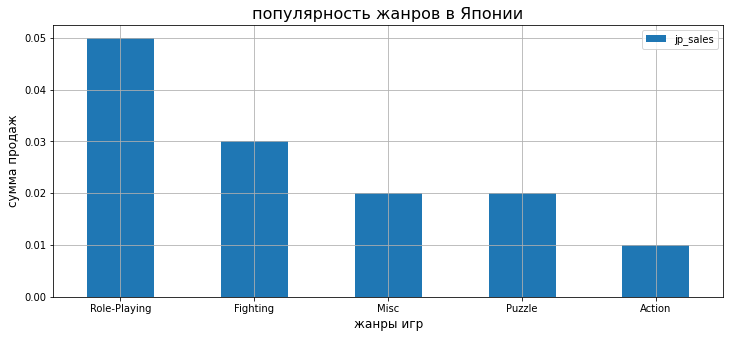

In [56]:
(
    data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='median')
    .sort_values(by='jp_sales',ascending=False)
    .head()
    .plot(kind='bar', grid=True, figsize = (12,5))
)
plt.title('популярность жанров в Японии', size=16)
plt.xlabel('жанры игр', size=12)
plt.ylabel('сумма продаж', size=12)
plt.xticks(rotation=0)
plt.show

Вывод: На основе вышесделанного анализа можно сделать вывод о том, что популярыне жанры в Европе и Северной Америке схожи, на первом месте по популярности находится Action. Однако в Японии более популярным является Role-Playing, а в Европе и Северной Америке он лишь на 4 месте.

<function matplotlib.pyplot.show(close=None, block=None)>

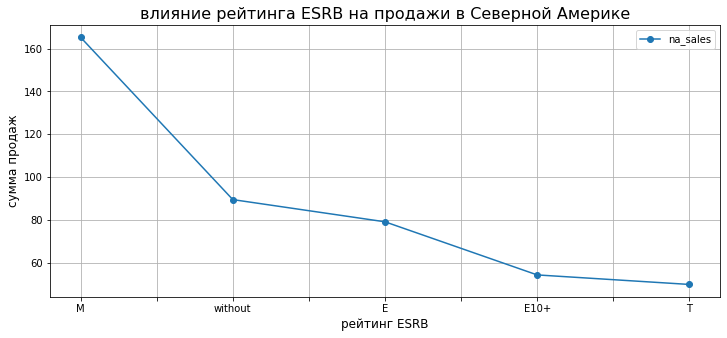

In [57]:
(
    data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales',ascending=False)
    .head()
    .plot(grid=True,figsize = (12,5), marker='o')
)
plt.title('влияние рейтинга ESRB на продажи в Северной Америке', size=16)
plt.xlabel('рейтинг ESRB', size=12)
plt.ylabel('сумма продаж', size=12)
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

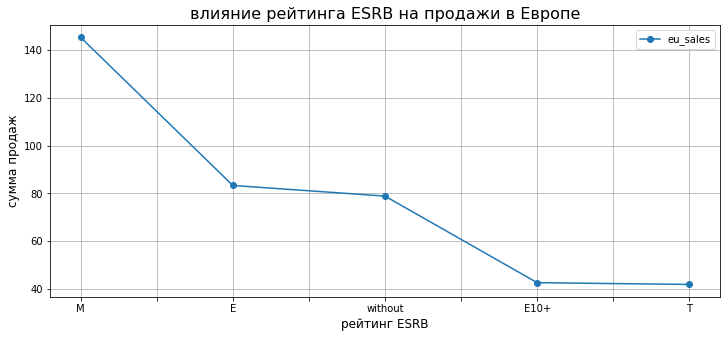

In [58]:
(
    data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales',ascending=False)
    .head()
    .plot(grid=True, figsize = (12,5), marker='o')
)
plt.title('влияние рейтинга ESRB на продажи в Европе', size=16)
plt.xlabel('рейтинг ESRB', size=12)
plt.ylabel('сумма продаж', size=12)
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

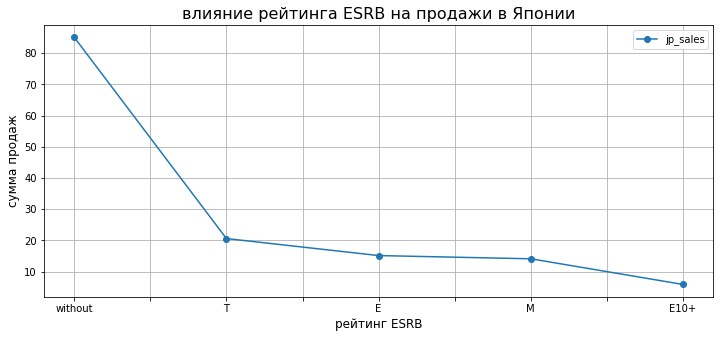

In [59]:
(
    data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales',ascending=False)
    .head()
    .plot(grid=True, figsize = (12,5), marker='o')
)
plt.title('влияние рейтинга ESRB на продажи в Японии', size=16)
plt.xlabel('рейтинг ESRB', size=12)
plt.ylabel('сумма продаж', size=12)
plt.xticks(rotation=0)
plt.show

Рейтинг Америки и Европы близко схожи. Лидерами рейтинга явлюсятся M' игры для взрослых, 'E' игры для всех, 'E10+' игры для всех от 10 лет и старше, 'T' подростки, а так же рейтинг без категории. В Японии к сожалению лидируют игры без рейтинга.

# Шаг 5. Проверьте гипотезы

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [60]:
data_actual = data_actual.dropna(subset=['user_score'])

In [61]:
data_pc = data_actual.query('platform == "PC"')['user_score']
data_xone = data_actual.query('platform == "XOne"')['user_score']

In [62]:
sample_1 = data_pc
sample_2 = data_xone

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Вывод: Не можем отвергнуть нулевую гипотезу так что с большей долей вороятности средние пользовательские рейтинги платформ Xbox One и PC не имеют существенных отличий. Нулевая гипотиза всегда формируется со знаком равества. У нас присуствуют две независимые выборки, метод будет использовать scipy.stats.ttest_ind.

5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 - Средние пользовательские рейтинги жанров Action и Sports равны.

H1 - Средние пользовательские рейтинги жанров Action и Sports разные.

In [63]:
data_action = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'] > 0)]['user_score']
data_sport = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'] > 0)]['user_score']

In [64]:
sample_1 = data_action
sample_2 = data_sport

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports равны')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные


Вывод: отвергаем нулевую гипотезу так как средние пользовательские рейтинги жанров Action и Sports имеют небольшое различие. Нулевая гипотиза всегда формируется со знаком равества. Сдесь так же две независимые выборки, нашим методом будет scipy.stats.ttest_ind.

# Шаг 6. Напишите общий вывод

По проведенным исследованиям могу сказать, что первые игры появились в 1980 и до 1995 их было минимальное количество, в связи с чем эти данные не брались для анализа. В 2008 и 2009 был пик выпуска компьютерных игр.  

Самыми популярными платформами по продажам являются:
 - PS2 
 - X360 
 - PS3 
 - Wii 

В среднем платформы существуют в течении 10 лет, после на смену им приходят новые платформы. Лидерами платформ по продажам являются PS4, PS3, XOne, 3DS, X360, в то время как PSP и DS приносят минимальное количество продаж. 

Потенциально прибыльные платформы на будущие года останутся Xone и PS4, так же можно отнести и 3DS, все остальные платформы уже исчерпали свою популярность.  

На основе анализа можно сделать вывод и о том, что отзывы критиков косвенно влияют на сумму продаж, в то время как оценки пользователей никак не влияют. Самыми распространенными жанрами в играх считаются Sports, Platform, но самым топовый жанр с большим отрывом является Shooter. Самую низкую прибыль показывает жанры Puzzle, Adventure. 

Что насчет регионов, Американский и Европейский рынок сильно похожи по популярности платформ и жанров. Популярной платформой для этих регионов является PS4 и жанр игр Shooter. Однако Япония глобально отличается от них. Топовым жанром у них выступает Role-Playing, а лучшей платформой является 3DS. Большая часть игр составляют игры с возрастной категорией ‘M’ (игры для взрослых).  

Из полученных данных провели гипотезы, которые нам показали, что средние пользовательские рейтинги платформ Xbox One и PC не имеют существенных отличий. Так же средние пользовательские рейтинги жанров Action и Sports имеют небольшое различие.

Можно предположить, что в 2017 году большим спросом будут пользоваться игры возрастной категории «M» на платформах PS4 и XOne.
